<a href="https://colab.research.google.com/github/waltermayor/DigitalImageProcessing_colab/blob/master/clase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Interpolación y transformaciones**

In [1]:


from google.colab import drive
drive.mount('/content/drive')



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
# importar librerias necesarias 

import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

path='/content/drive/My Drive/colab/images/'
os.chdir(path)
!pwd

# graficar imagenes estaticas en el notebook
%matplotlib inline


/content/drive/My Drive/colab/images


In [0]:
def displayGray3(a, b,c,title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(3,3))
    plt.subplot(131), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c,cmap='gray'), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayGray2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(121), plt.imshow(a,cmap='gray'), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(b,cmap='gray'), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor3(a, b,c,title1 = "Original", title2 = "Edited", title3 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.subplot(133), plt.imshow(c), plt.title(title3)
    plt.xticks([]), plt.yticks([])
    plt.show()
    
def displayColor2(a, b,title1 = "Original", title2 = "Edited"):
    plt.figure(figsize=(10,10))
    plt.subplot(131), plt.imshow(a), plt.title(title1)
    plt.xticks([]), plt.yticks([])
    plt.subplot(132), plt.imshow(b), plt.title(title2)
    plt.xticks([]), plt.yticks([])
    plt.show()

def readRGB(imgPath):
    img = cv2.imread(imgPath)
    img =cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    return img

## **Interpolación Nearest Neighbour**

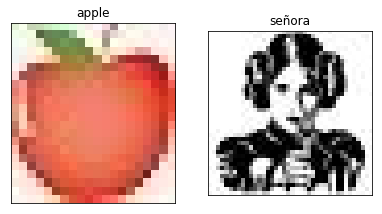

In [25]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
near_imgA = cv2.resize(imgA,None, fx = 5, fy = 5, interpolation = cv2.INTER_NEAREST)
near_imgM = cv2.resize(imgM,None, fx = 5, fy = 5, interpolation = cv2.INTER_NEAREST)
displayColor2(near_imgA,near_imgM,'apple','señora')

## **Interpolación bilinear**

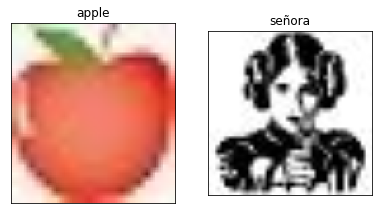

In [24]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
bili_imgA = cv2.resize(imgA,None, fx = 5, fy = 5, interpolation = cv2.INTER_LINEAR)
bili_imgM = cv2.resize(imgM,None, fx = 5, fy = 5, interpolation = cv2.INTER_LINEAR)
displayColor2(bili_imgA,bili_imgM,'apple','señora')

## **Interpolación bicubica**

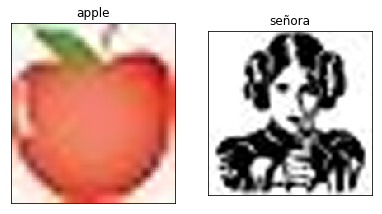

In [26]:
imgA = readRGB('apple20x22.jpg')
imgM = readRGB('ico.jpg')
bicu_imgA = cv2.resize(imgA,None, fx = 5, fy = 5, interpolation = cv2.INTER_CUBIC)
bicu_imgM = cv2.resize(imgM,None, fx = 5, fy = 5, interpolation = cv2.INTER_CUBIC)
displayColor2(bicu_imgA,bicu_imgM,'apple','señora')

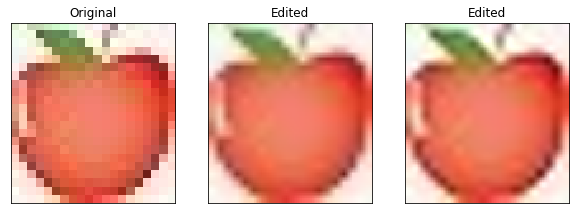

In [29]:
displayColor3(near_imgA,bili_imgA,bicu_imgA)

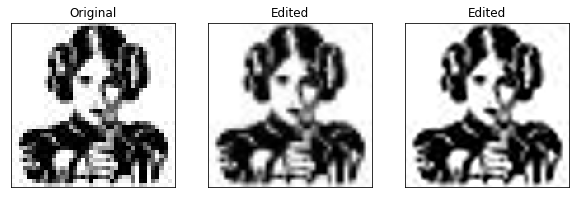

In [30]:
displayColor3(near_imgM,bili_imgM,bicu_imgM)

## **Negativo de una imagen a Color**

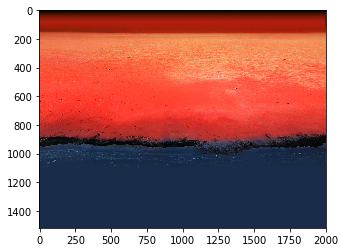

In [10]:
from PIL import Image
 
foto = Image.open('playa.jpg')
 
datos = list(foto.getdata())
 
datos_invertidos = [(255 - datos[x][0], 255 - datos[x][1], 255 - datos[x][2]) for x in range(len(datos))]
 
imagen_invertida = Image.new('RGB', foto.size)
 
imagen_invertida.putdata(datos_invertidos)
 
#imagen_invertida.save('playa2.jpg')
 
plt.imshow(np.asarray(imagen_invertida))


## **Negatio de una imagen en escala de gris**

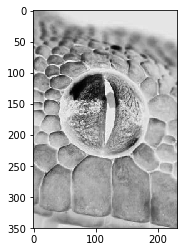

In [11]:
from PIL import Image
 
foto = Image.open('ojo.jpg')
 
datos = foto.getdata()
 
datos_invertidos = [255 - x for x in datos]
 
imagen_invertida = Image.new('L', foto.size)
 
imagen_invertida.putdata(datos_invertidos)
 
#imagen_invertida.save('ruta_y_nombre_del_archivo')
 
plt.imshow(np.asarray(imagen_invertida),cmap='gray')

## **Transformación logaritmica**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


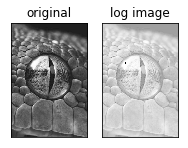

In [12]:
import cv2
import numpy as np
# Load the image
img = cv2.imread('ojo.jpg')
# Apply log transform
img_log = (np.log(img+1)/(np.log(1+np.max(img))))*255
# Specify the data type
img_log = np.array(img_log,dtype=np.uint8)
# Display the image
displayGray2(img,img_log,'original','log image')



## **Tranformación ley de potencia (gamma)**

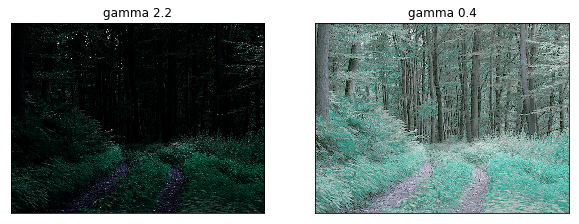

In [19]:
import numpy as np
import cv2
# Load the image
img = cv2.imread('tree.png')
# Apply Gamma=2.2 on the normalised image and then multiply by scaling constant (For 8 bit, c=255)
gamma_two_point_two = np.array(255*(img/255)**2.2,dtype='uint8')
# Similarly, Apply Gamma=0.4 
gamma_point_four = np.array(255*(img/255)**0.4,dtype='uint8')
# Display the images in subplots
displayGray2(gamma_two_point_two,gamma_point_four,'gamma 2.2','gamma 0.4')



## **Bit plane slicing**

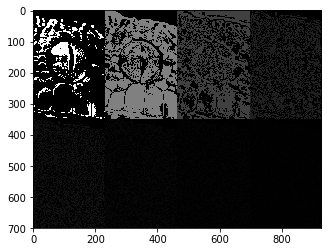

In [14]:
img = cv2.imread('ojo.jpg',0)
 
#Iterate over each pixel and change pixel value to binary using np.binary_repr() and store it in a list.
lst = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
         lst.append(np.binary_repr(img[i][j] ,width=8)) # width = no. of bits
 
# We have a list of strings where each string represents binary pixel value. To extract bit planes we need to iterate over the strings and store the characters corresponding to bit planes into lists.
# Multiply with 2^(n-1) and reshape to reconstruct the bit image.
eight_bit_img = (np.array([int(i[0]) for i in lst],dtype = np.uint8) * 128).reshape(img.shape[0],img.shape[1])
seven_bit_img = (np.array([int(i[1]) for i in lst],dtype = np.uint8) * 64).reshape(img.shape[0],img.shape[1])
six_bit_img = (np.array([int(i[2]) for i in lst],dtype = np.uint8) * 32).reshape(img.shape[0],img.shape[1])
five_bit_img = (np.array([int(i[3]) for i in lst],dtype = np.uint8) * 16).reshape(img.shape[0],img.shape[1])
four_bit_img = (np.array([int(i[4]) for i in lst],dtype = np.uint8) * 8).reshape(img.shape[0],img.shape[1])
three_bit_img = (np.array([int(i[5]) for i in lst],dtype = np.uint8) * 4).reshape(img.shape[0],img.shape[1])
two_bit_img = (np.array([int(i[6]) for i in lst],dtype = np.uint8) * 2).reshape(img.shape[0],img.shape[1])
one_bit_img = (np.array([int(i[7]) for i in lst],dtype = np.uint8) * 1).reshape(img.shape[0],img.shape[1])
 
#Concatenate these images for ease of display using cv2.hconcat()
finalr = cv2.hconcat([eight_bit_img,seven_bit_img,six_bit_img,five_bit_img])
finalv =cv2.hconcat([four_bit_img,three_bit_img,two_bit_img,one_bit_img])
 
# Vertically concatenate
final = cv2.vconcat([finalr,finalv])
plt.imshow(final,cmap='gray')

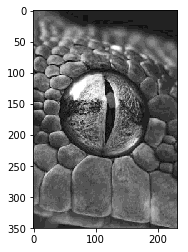

In [15]:
new_img = eight_bit_img+seven_bit_img+six_bit_img+five_bit_img
plt.imshow(new_img,cmap='gray')